# Data & Apprentissage, M2CHPS 2022

## 4th Lab Session

**Instructor:** [Argyris Kalogeratos](http://kalogeratos.com) (contact: argyris.kalogeratos@ens-paris-saclay.fr).  
**Sylabus:** [http://nvayatis.perso.math.cnrs.fr/CHPScourse-2022.html](http://nvayatis.perso.math.cnrs.fr/CHPScourse-2022.html)

The most updated version of this file can be found at instructor's webpage:  
[http://kalogeratos.com/MyCourses/DML-M2HPC/Lab#.ipynb](http://kalogeratos.com/psite/files/MyCourses/DML-M2HPC/Lab#.ipynb),
where '#' should be replaced by the number of the lab session. These notebooks are self-contained and hence have all the needed links to other resources.

Part of the scikit-learn material comes from its [online documentations and tutorial](https://scikit-learn.org/stable/modules/linear_model.html).


## Table of Contents

0. <a href="#0.-Before-you-start">Before you start</a>
1. <a href="#1.-Robust-regression-with-RANSAC">Robust regression with RANSAC</a>
2. <a href="#2.-Nearest-Neighbors-Classification">Nearest Neighbors Classification</a>
3. <a href="#3.-Decision-Trees">Decision Trees</a>
4. <a href="#4.-Support-Vector-Machines">Support-Vector-Machines</a>
5. <a href="#-Assignment-2">Assignment</a>

## 1. [Nearest Neighbors Classification](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)

### 1.1. Standard algorithm

Neighbors-based classification is a type of *instance-based learning* or *non-generalizing learning*: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is typically omputed from a simple *majority vote* of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

Scikit-learn implements two different nearest neighbors classifiers: 
* ``KNeighborsClassifier`` implements learning based on the $k$ nearest neighbors of each query point, where $k$ is an integer value specified by the user. This is the most commonly used technique. The optimal choice of the value $k$ is highly data-dependent: in general a larger $k$ suppresses the effects of noise, but makes the classification boundaries less distinct.
* ``RadiusNeighborsClassifier`` implements learning based on the number of neighbors within a fixed radius  of each training point, where $r$ is a floating-point value specified by the user. In cases where the data is not uniformly sampled, radius-based neighbors classification in RadiusNeighborsClassifier can be a better choice. The user specifies a fixed radius $r$, such that points in sparser neighborhoods use fewer nearest neighbors for the classification. For high-dimensional parameter spaces, this method becomes less effective due to the so-called “curse of dimensionality”.

**Vote weighting schemes:** The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. This can be accomplished through the ``weights`` keyword. The default value, ``weights = 'uniform'``, assigns uniform weights to each neighbor. ``weights = 'distance'`` assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied to compute the weights.

**Neighbor search:** As one can see, this type of algorithm can be computationally heavy for large datasets. The core operation is what is called *neighbor search* (note: this is a scientific problem on its own), which is to find the neighbors of a given point out of the whole dataset. The brute force algorithm goes through all data objects one by one and is only applicable in small datasets. More efficient search uses sophisticated data structures (e.g. K-D trees, ball Tree...), and can provide either approximate or accurate results.

**Aplication on the Iris dataset**

C:\Users\Bott\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
C:\Users\Bott\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


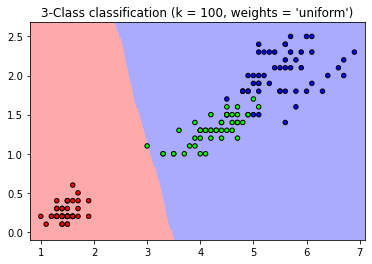

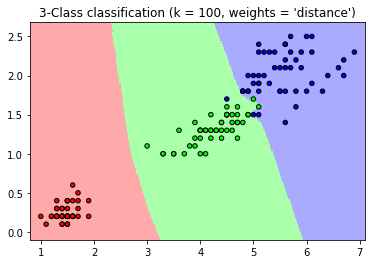

Object `schemes` not found.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

k = 3

# import some data to play with
iris = datasets.load_iris()

# just as a toy case, we only take the first two features
X = iris.data[:, 2:4]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# apply the two vote weighting schemens
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(k, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max] x [y_min, y_max].
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (k, weights))

plt.show()

**Question:** What kind of differences you observe in the results obtained from the different weighting schemes?

Try considering a different pair of features.  
E.g by changing line 12 with: ``X = iris.data[:, 1:3]``  
What difference do you observe in the result?

### 1.2. Nearest Centroid Classifier

The ``NearestCentroid`` classifier is a simple algorithm that represents
each class by the centroid of its members. In effect, this makes it
similar to the label updating phase of the $k$-means algorithm.
It also has no parameters to choose, making it a good baseline classifier. It
does, however, suffer when classes have non-convex shapes, as well as when classes have
a lot different variance, because what it assumes is equal variance in all dimensions. See Linear Discriminant Analysis (``sklearn.discriminant_analysis.LinearDiscriminantAnalysis``)
and Quadratic Discriminant Analysis (``sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis``)
for more complex methods that do not make this assumption.

Note that here there is no notion of $k$ as number of neighbors...

**Simple example of the default ``NearestCentroid`` method**

In [3]:
import numpy as np
from sklearn.neighbors import NearestCentroid

# create some 2D points
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
# set the ground truth labels
y = np.array([1, 1, 1, 2, 2, 2])

# create and fit the model (i.e. compute the centroids of the data classes)
clf = NearestCentroid()
clf.fit(X, y)
NearestCentroid(metric='euclidean', shrink_threshold=None)

# predict for a new observation
point = [-0.8, -1]
print(clf.predict([point]))

[1]


**Nearest Shrunken Centroid**

The ``NearestCentroid`` classifier has a ``shrink_threshold`` parameter, which implements the nearest shrunken centroid classifier. In effect, the value of each feature for each centroid is divided by the within-class variance of that feature. The feature values are then reduced by ``shrink_threshold``. Most notably, if a particular feature value crosses zero, it is set
to zero. This removes the feature from affecting the classification and is useful, for example, for removing noisy features.

In the example below, using a small shrink threshold increases the accuracy of
the model from 0.81 to 0.82.

None 0.8133333333333334
0.2 0.82
0.4 0.82
0.8 0.8133333333333334


C:\Users\Bott\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
C:\Users\Bott\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
C:\Users\Bott\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X 

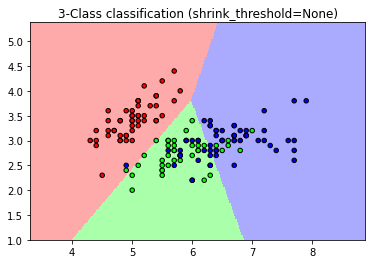

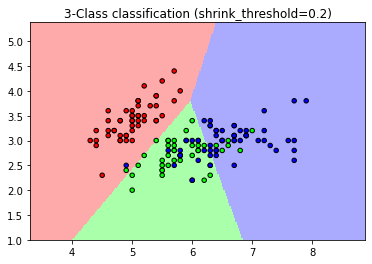

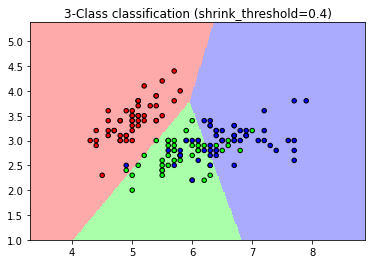

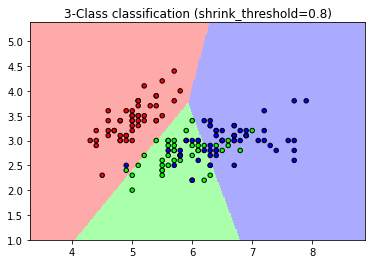

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import NearestCentroid

# import some data and take the first two features
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for shrinkage in [None, .2]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(shrinkage, np.mean(y == y_pred))
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.title("3-Class classification (shrink_threshold=%r)"
              % shrinkage)
    plt.axis('tight')

plt.show()

## 2. Decision Trees

[Simple example on Iris dataset](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py)

Decision surface of a decision tree trained on pairs of features of the iris dataset. For each pair of data features, the decision tree learns *decision boundaries* using combinations of *simple thresholding rules* that are inferred from the training samples.

The tree structure of a tree built on all of the features is also shown.

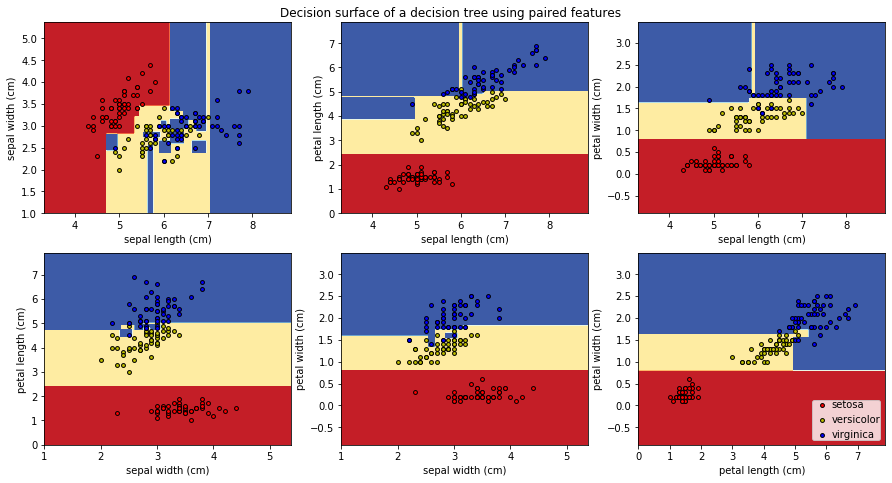

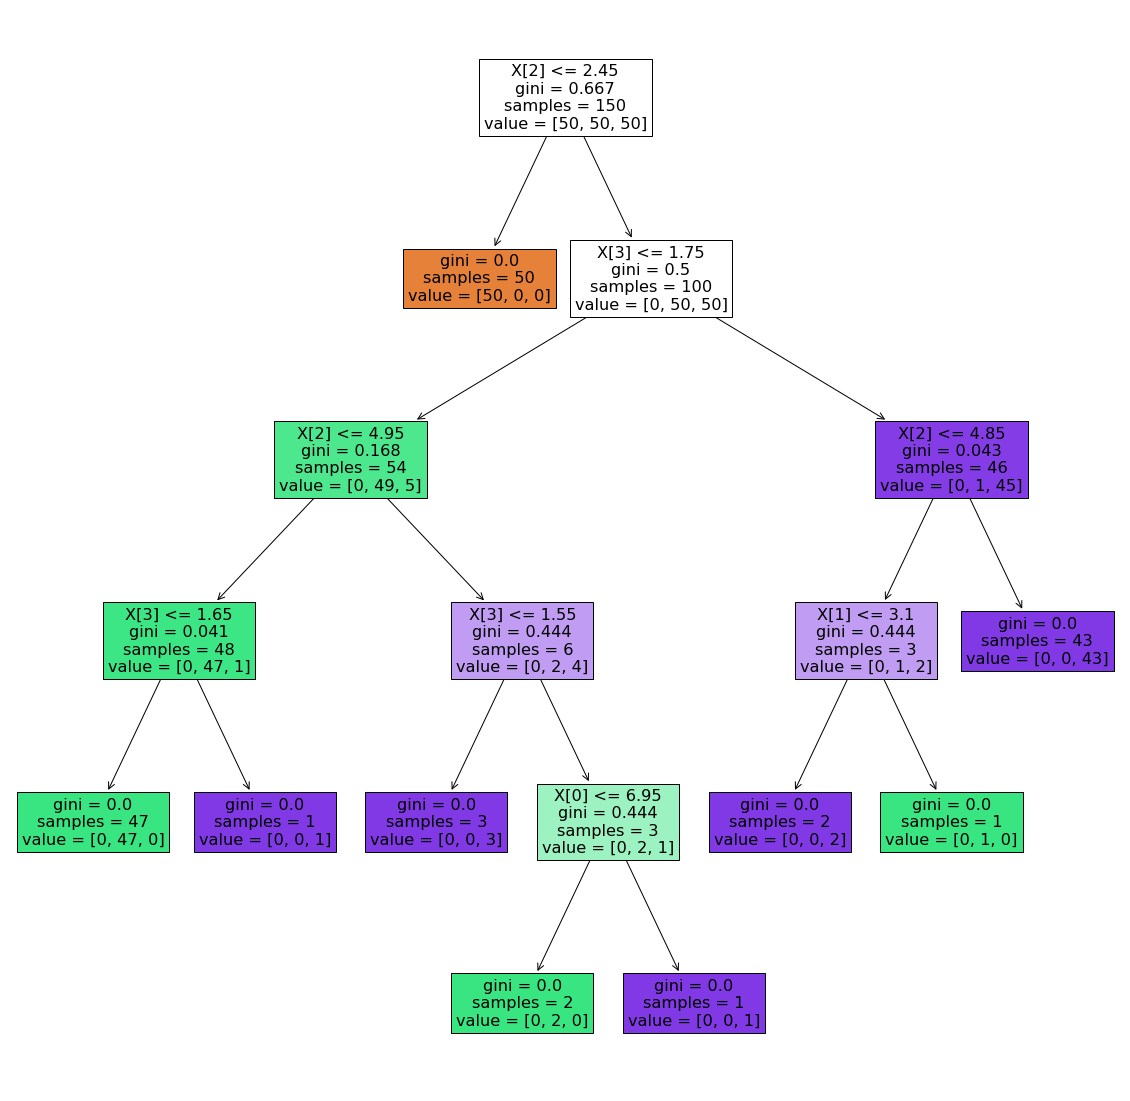

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

plt.figure(figsize=(13,7))

# Load data
iris = load_iris()
# go through the pairs of features (there are 4 features in total)
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # Take the two features
    X = iris.data[:, pair]
    y = iris.target

    # Train the decision tree
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

# creates a tree object and shows the default parametrization
dtree = DecisionTreeClassifier()
# fits the tree
dtree.fit(iris.data, iris.target)

plt.figure(figsize=(20,20))

# This visualizes the tree. You should use the latest scikit-learn and sklearn versions.
# Recall that you can do that by running in a code cell: !pip install -U scikit-learn 
tree.plot_tree(dtree, filled=True)
plt.show()

The **Gini coefficient** reported at each tree node is an index measures the inequality in a probability distribution. In this context, it measures the extend to which each node gathers samples of one only data class. So, note that when there is a perfect precision, e.g. $Gini([0,47,0]) = 0$, $Gini([50,50,0]) = 0.5$, and $Gini([50,50,50]) = 0.667$.

## 3. [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html#classification)

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

* Effective in high dimensional spaces.
* Still effective in cases where the number of features is greater than the number of samples.
* Uses a subset of training points in the decision function (called *support vectors*), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom ones.

The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).
* The support vector machines in scikit-learn support both dense (numpy.ndarray and convertible to that by numpy.asarray) and sparse (any scipy.sparse) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered numpy.ndarray (dense) or scipy.sparse.csr_matrix (sparse) with dtype=float64.

**Online demo:** [https://dash-gallery.plotly.host/dash-svm/](https://dash-gallery.plotly.host/dash-svm/)

### 3.1 [Maximum margin separating hyperplane](https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py)

Plot the maximum margin separating hyperplane within a two-class separable dataset using a Support Vector Machine classifier with linear kernel.

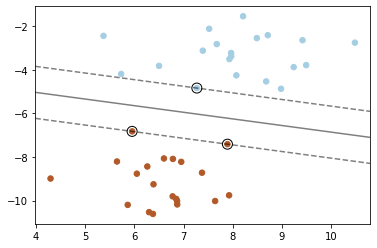

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### 3.2 [SVM with various kernels](https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py)

A tutorial exercise for using different SVM kernels. 
This is used in this [supervised learning tutorial](https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#using-kernels-tut).

C:\Users\Bott\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
C:\Users\Bott\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
C:\Users\Bott\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X 

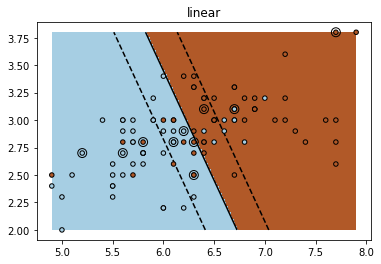

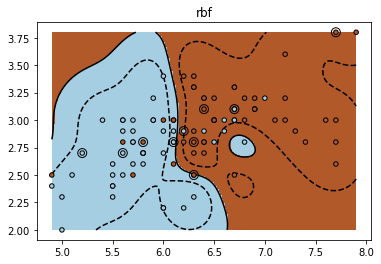

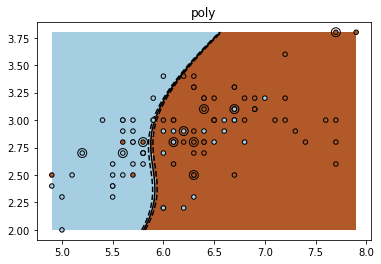

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for kernel in ('linear', 'rbf', 'poly'):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

## 4. Cross-validation

### 4.1. k-fold Cross-validation

**SVM using a single data split**

Note that $C>0$ is a regularization parameter. The strength of the regularization is inversely proportional to C. In fact this is a squared $\ell_2$ penalty.

In [33]:
from sklearn import datasets, svm
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.98

**SVM using $k$-fold cross-validation**

In [34]:
import numpy as np

X_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)
scores = list()

# train and test for the split indicated by each fold
for k in range(3):
    # We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))

# show fitting performance for the different folds
print(scores)

[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]


### 4.2. [Cross-validation on Digits Dataset Exercise](https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_digits.html#sphx-glr-auto-examples-exercises-plot-cv-digits-py)

A tutorial exercise using Cross-validation with an SVM on the Digits dataset.

This exercise is used in this [CV tutorial](https://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html#cv-generators-tut).

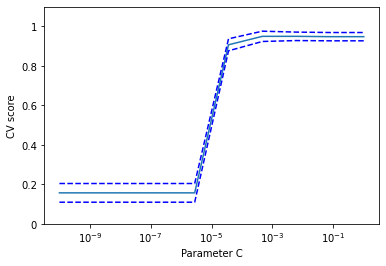

In [5]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm
import matplotlib.pyplot as plt

# load digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# create the svm model/object
svc = svm.SVC(kernel='linear')
# set the search space for the model parameter C
C_s = np.logspace(-10, 0, 10)

scores = list()
scores_std = list()

# do the following for each different C value in the search space
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, cv=5, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

# Do the plotting
plt.figure()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

## 5. Logistic Regression

A simple example how logistic regression can be used for classifying data. We will see more details in the next course.

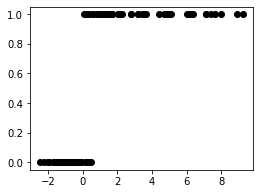

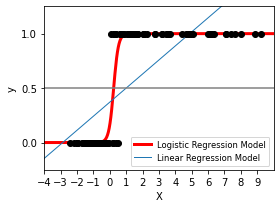

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy.special import expit

# General a toy dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]
plt.figure(1, figsize=(4, 3))
plt.scatter(X, y, color='black',)

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(2, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()